### DATASET INFORMATION: 




### 1.	Data Understanding (8 marks)

a.	Read the dataset (tab, csv, xls, txt, inbuilt dataset). What are the number of rows and no. of cols & types of variables (continuous, categorical etc.)? (1 MARK)

b.	Calculate five-point summary for numerical variables (1 MARK)

c.	Summarize observations for categorical variables – no. of categories, % observations in each category. (2 mark)

d.	Check for defects in the data such as missing values, null, outliers, etc and also check for class imbalance. (4 marks)



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv('emp_attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,YearsAtCompany
0,33,Yes,Travel_Frequently,Research & Development,3,Life Sciences,1,Male,3,1,Research Scientist,1,3348,1,Yes,11,3,10
1,32,Yes,Travel_Rarely,Sales,4,Medical,4,Male,1,3,Sales Executive,4,10400,1,No,11,3,14
2,40,Yes,Travel_Rarely,Research & Development,9,Life Sciences,4,Male,3,1,Laboratory Technician,1,2018,3,No,14,3,5
3,42,No,Travel_Rarely,Research & Development,7,Medical,2,Female,4,2,Research Scientist,2,2372,6,Yes,16,3,1
4,43,No,Travel_Frequently,Research & Development,27,Life Sciences,3,Female,3,3,Manufacturing Director,1,10820,8,No,11,3,8


In [2]:
df.shape

#1580 rows and 18 columns


(1580, 18)

In [3]:
df.dtypes

Age                         int64
Attrition                  object
BusinessTravel             object
Department                 object
DistanceFromHome            int64
EducationField             object
EnvironmentSatisfaction     int64
Gender                     object
JobInvolvement              int64
JobLevel                    int64
JobRole                    object
JobSatisfaction             int64
MonthlyIncome               int64
NumCompaniesWorked          int64
OverTime                   object
PercentSalaryHike           int64
PerformanceRating           int64
YearsAtCompany              int64
dtype: object

In [4]:
df_cat = df.select_dtypes('O')
catlist = df_cat.columns.to_list()
print('The categorical columns => ',catlist)

The categorical columns =>  ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'OverTime']


In [5]:
df_num = df.select_dtypes(np.number)
df_num.columns

Index(['Age', 'DistanceFromHome', 'EnvironmentSatisfaction', 'JobInvolvement',
       'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'YearsAtCompany'],
      dtype='object')

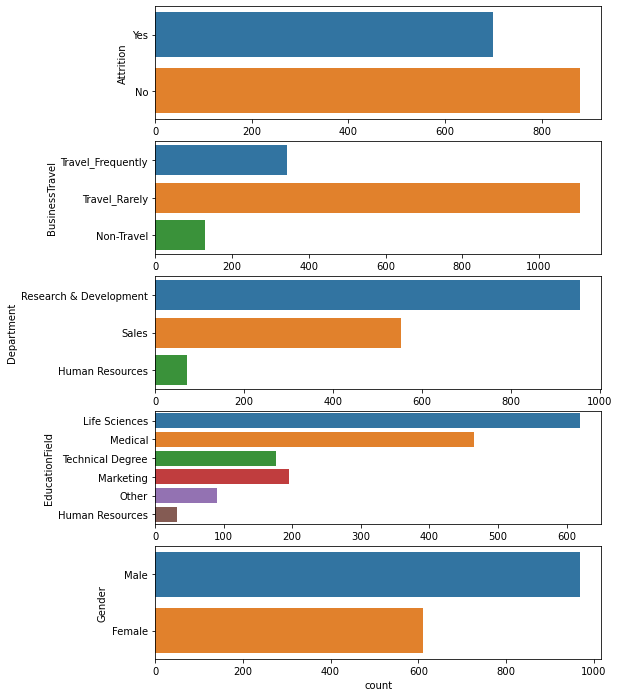

In [6]:
fig,ax = plt.subplots(nrows = 5,ncols = 1,figsize = (8,12))
df_cat = df.select_dtypes('O')
for i,j in zip(df_cat.columns,ax.flatten()):
    sns.countplot(y = df_cat[i],ax=j)
    
plt.show()

In [7]:

#Five point summary 

df_num.describe()


,Age,DistanceFromHome,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,YearsAtCompany
count,1580.000000,1580.000000,1580.000000,1580.000000,1580.000000,1580.000000,1580.000000,1580.000000,1580.000000,1580.0,1580.000000
mean,34.339241,9.743671,2.648734,2.660127,1.705696,2.668354,4957.425949,2.470886,13.942405,3.0,5.206329
std,8.828037,8.227881,1.107876,0.755176,0.800629,1.105636,3059.158533,2.232193,2.425033,0.0,3.949229
min,18.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1009.000000,0.000000,11.000000,3.0,0.000000
25%,28.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2571.750000,1.000000,12.000000,3.0,2.000000
50%,33.000000,8.000000,3.000000,3.000000,2.000000,3.000000,4148.000000,1.000000,13.000000,3.0,5.000000
75%,39.000000,16.000000,4.000000,3.000000,2.000000,4.000000,6397.000000,4.000000,16.000000,3.0,8.000000
max,60.000000,29.000000,4.000000,4.000000,4.000000,4.000000,16555.000000,8.000000,19.000000,3.0,18.000000


In [8]:
df_cat.describe()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,OverTime
count,1580,1580,1580,1580,1580,1580,1580
unique,2,3,3,6,2,9,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,No
freq,880,1107,956,620,969,388,1023


In [9]:
#Null value check

df.isnull().sum()

Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
DistanceFromHome           0
EducationField             0
EnvironmentSatisfaction    0
Gender                     0
JobInvolvement             0
JobLevel                   0
JobRole                    0
JobSatisfaction            0
MonthlyIncome              0
NumCompaniesWorked         0
OverTime                   0
PercentSalaryHike          0
PerformanceRating          0
YearsAtCompany             0
dtype: int64

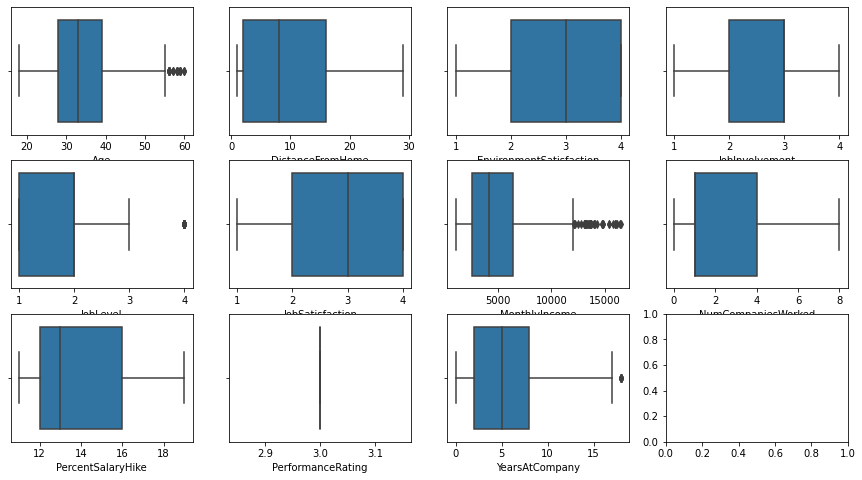

In [10]:
#Outliercheck

fig,ax = plt.subplots(nrows = 3,ncols = 4,figsize = (15,8))
df_num = df.select_dtypes(np.number)
for i,j in zip(df_num.columns,ax.flatten()):
    sns.boxplot(df_num[i],ax=j)
    
plt.show()

In [11]:
#Imbalance check
df['Attrition'].value_counts()/len(df) * 100

No     55.696203
Yes    44.303797
Name: Attrition, dtype: float64

### 2.	Data Preparation (17 marks)

a.	Fix the defects found above and do appropriate treatment if any. (4 marks)

b.	Visualize the data using relevant plots. Find out the variables which are highly correlated with Target? (5 marks)

c.	Do you want to exclude some variables from the model based on this analysis? What other actions will you take before moving ahead with model creation? (4 marks)

d. Split dataset into train and test (70:30). Are both train and test representative of the overall data? How would you ascertain this statistically? (4 marks)

In [12]:
#Dropping unique columns if any 

In [13]:
#Null value imputation if any

In [14]:
#scaling

from sklearn.preprocessing import StandardScaler
df_num = df.select_dtypes(np.number)
df_cat = df.select_dtypes('O')
ss = StandardScaler().fit_transform(df_num.values)

df_num = pd.DataFrame(ss,index = df_num.index,columns = df_num.columns)

df = pd.concat([df_num,df_cat],axis = 1)
df.isnull().sum()

Age                        0
DistanceFromHome           0
EnvironmentSatisfaction    0
JobInvolvement             0
JobLevel                   0
JobSatisfaction            0
MonthlyIncome              0
NumCompaniesWorked         0
PercentSalaryHike          0
PerformanceRating          0
YearsAtCompany             0
Attrition                  0
BusinessTravel             0
Department                 0
EducationField             0
Gender                     0
JobRole                    0
OverTime                   0
dtype: int64

In [15]:
#Outlier treatment 

df_num = df.select_dtypes(np.number)
q1 = df_num.quantile(0.25)
q3 = df_num.quantile(0.75)

iqr = q3 - q1

df = df[~((df < (q1 - 1.5 * iqr)) | (df > ( q3 + 1.5 * iqr))).any(axis = 1)]
df.shape


(1487, 18)

<AxesSubplot:>

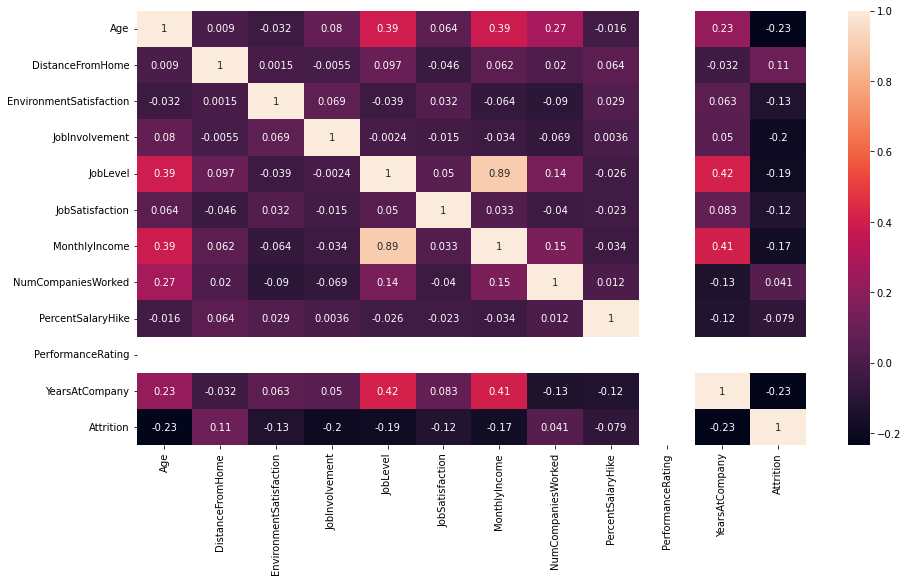

In [16]:


df['Attrition'] = pd.get_dummies(df['Attrition'],drop_first = True)

plt.figure(figsize = (15,8))

sns.heatmap(df.corr(),annot = True)

In [17]:
x = df.drop('Attrition',axis = 1)

x = pd.get_dummies(x,drop_first = True)

y = df['Attrition']

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()

vif['vif_factor'] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]

vif['features'] = x.columns

multi = vif.sort_values('vif_factor',ascending = False).head()
multi = multi.features.to_list()
multi

['JobRole_Sales Representative',
 'JobRole_Sales Executive',
 'Department_Sales',
 'Department_Research & Development',
 'EducationField_Life Sciences']

In [18]:
x = x.drop(multi,axis = 1)

y = df['Attrition']

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3)


from scipy.stats import ttest_ind

ttest_ind(y_train,y_test)

Ttest_indResult(statistic=-0.5671172239319914, pvalue=0.5707202544607655)

In [19]:
ttest_ind(x_train,x_test)

Ttest_indResult(statistic=array([ 0.66241191,  0.09137395,  0.39972475,  0.41053315,  1.09933972,
       -1.97535899,  0.75959174, -0.80540245, -1.17380522,         nan,
       -0.23261363, -0.70573434,  1.07417141,  1.15679974, -0.499914  ,
       -1.80963589,  0.41487304,  0.60069115, -0.78941465,  1.34122172,
       -0.48524666, -0.22806703, -0.459873  , -1.86471605, -1.6234067 ]), pvalue=array([0.50781006, 0.92720778, 0.68941675, 0.68147412, 0.2717981 ,
       0.04841234, 0.44761922, 0.42071642, 0.24066127,        nan,
       0.8160935 , 0.48046405, 0.28292037, 0.24754024, 0.6172097 ,
       0.07055438, 0.67829477, 0.54813738, 0.42999572, 0.18005356,
       0.62757296, 0.81962553, 0.6456747 , 0.06241835, 0.10471473]))

In [20]:
#h0: The training and test data truly represent each other

#h1: The training and test data do not truly represent each other

#Since the P values of training and test data are higher than alpha (0.05), 

#We can accept H0,The training and test data truly represent each other

### 3.	Model Building (25 marks)

a.	Fit a base model and explain the reason of selecting that model. Please write your key observations. (5 marks)

b.	What is the overall Accuracy? Please comment on whether it is good or not.  (4 mark)

c.	Evaluate the model built using Precision, Recall and F1 Score and what will be the optimization objective keeping in mind the problem statement. (5 marks) 

d.	How do you improve the accuracy of the model? Write clearly the changes that you will make before re-fitting the model. Fit the final model.  (7 marks)

e.	Write down a business interpretation/explanation of the model – which variables are affecting the target the most and explain the relationship. Feel free to use charts or graphs to explain. (4 marks)


In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
dtc = DecisionTreeClassifier(random_state = 1)

model = dtc.fit(x_train,y_train)

print('Training accuracy',model.score(x_train,y_train))
print('Test accuracy',model.score(x_test,y_test))

Training accuracy 1.0
Test accuracy 0.8926174496644296


In [22]:
from sklearn.metrics import classification_report
y_pred = model.predict(x_test)

print(classification_report(y_test,y_pred))



              precision    recall  f1-score   support

           0       0.98      0.82      0.89       240
           1       0.82      0.98      0.89       207

    accuracy                           0.89       447
   macro avg       0.90      0.90      0.89       447
weighted avg       0.91      0.89      0.89       447



In [23]:
#Reason for selection model and key observations

#We have selected Decision tree classification algorithm for our base model 

#It is a classification algorith used when target is categorical in nature

# DTC is very useful for solving decision-related problems




In [24]:
#Overall accuracy and inference 

#Our model gave 100% accuracy in training and 80% in test

#There is severe overfitting in our model


In [25]:
#Classification report metrics evaluation 


#The recall score tells you how many of this class you find over the whole number of element of this class

#The precision Score tells you how many are correctly classified among that class

#The f1-score is the harmonic mean between precision & recall

In [26]:

# To improve accuracy select good features from the model using RFE


from sklearn.feature_selection import RFE

rfe_model = RFE(estimator = dtc,n_features_to_select = 6)

rfe_model = rfe_model.fit(x_train,y_train)

df_rfe = pd.DataFrame()

df_rfe['features'] = x.columns

df_rfe['ranking'] = rfe_model.ranking_

top = df_rfe[df_rfe['ranking']==1]

top = top.features.to_list()
top

['Age',
 'DistanceFromHome',
 'MonthlyIncome',
 'PercentSalaryHike',
 'YearsAtCompany',
 'OverTime_Yes']

In [27]:
x_top = x[top]
y = df['Attrition']

x_train,x_test,y_train,y_test = train_test_split(x_top,y,test_size = 0.3)

model_top = dtc.fit(x_train,y_train)

print('Training accuracy',model_top.score(x_train,y_train))
print('Test accuracy',model_top.score(x_test,y_test))
#Still overfitting is present

Training accuracy 1.0
Test accuracy 0.9105145413870246


In [28]:
#Hyper parameter tuning

from sklearn.model_selection import GridSearchCV

tuned_params = [{'criterion':['entropy','gini'],'max_depth':range(2,10)}]

tree_grid = GridSearchCV(estimator = dtc,param_grid = tuned_params,cv = 10)


In [29]:
tree_grid.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=1),
             param_grid=[{'criterion': ['entropy', 'gini'],
                          'max_depth': range(2, 10)}])

In [30]:
tree_grid.best_params_

{'criterion': 'entropy', 'max_depth': 9}

In [31]:
dtc_tuned = DecisionTreeClassifier(criterion = 'gini',max_depth = 9, random_state = 1)

model_final = dtc_tuned.fit(x_train,y_train)

print('Training accuracy',model_final.score(x_train,y_train))
print('Test accuracy',model_final.score(x_test,y_test))



Training accuracy 0.9326923076923077
Test accuracy 0.8612975391498882


In [32]:
from sklearn.metrics import classification_report
y_pred = model_final.predict(x_test)

print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.92      0.82      0.87       244
           1       0.81      0.92      0.86       203

    accuracy                           0.86       447
   macro avg       0.86      0.87      0.86       447
weighted avg       0.87      0.86      0.86       447



In [33]:
#Final model selected => Why we selected this model and changes done from base model

# Firstly, we treated multicollinearity in our model and removed the features with highest vif factor 

#We fit the basic model using DTC

#Since the base model was found to have severe overfitting,
#we selected best features using Recursive feature elimination (RFE)

#We built our next model using only the features selected using RFE 

# There was % accuracy in training and % accuracy in test

#Finally we used Grid search CV to hyper tune our model and get the best parameters

#After fitting the model using the tuned paramters, we recieved... and considered it as our final model

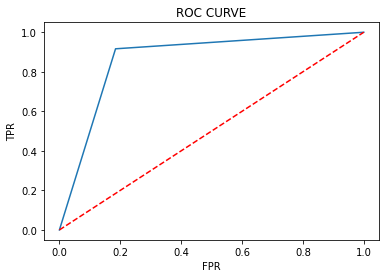

In [34]:
#Business interpretation of final model

from sklearn.metrics import roc_auc_score,roc_curve

fpr,tpr,th = roc_curve(y_test,y_pred)


plt.plot(fpr,tpr,label = 'Decision Tree Classification')

plt.plot([0,1],[0,1],'r--')
plt.title('ROC CURVE')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()



In [35]:
#Interpretation

#We can see that the area under the curve is ver high.

#The true positive rate has peaked and the curve is very close to 1, showing that this is a good model



In [36]:
roc_auc_score(y_test,y_pred)

#The score is higher than 85% which means that this is a very good model

0.8659149640636357

<AxesSubplot:>

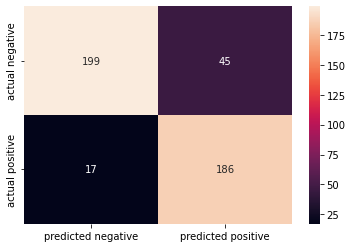

In [37]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,y_pred)


conf_mat = pd.DataFrame(data = cm ,columns=['predicted negative','predicted positive'],index=['actual negative','actual positive'])

sns.heatmap(conf_mat,annot = True,fmt = 'd')

In [38]:
#From the confusion matrix we can see that the Predict Positive and Actual positive values are very high

# This means that the True positives are predicted well by our model

#Similarly predicted negative and actual negative are high.

#This means that our model has predicted true negatives well

#The false positive and False negative are very less in a model and hence there is no Type 1 or 2 error. 



In [39]:
df['Attrition'].value_counts()

0    815
1    672
Name: Attrition, dtype: int64